In [67]:
#import the tools we need for the modelling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [68]:
#trying out cufflinks
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
#for connecting javascript to notebook
init_notebook_mode(connected=True)
cf.go_offline()

#Features are my columns, rows represent outcomes
#Use data to determine an outcome.
#Choose features that best split data i.e. maximize my information gain off of my split
#weakness in decesion trees is the high variance
#Random Forests have better performance bc they decorrelate resulting trees by randomly leaving out candidate features from each split
#results in an averaging process with reduced variance

# Kyphosis Data set 

In [4]:
df = pd.read_csv('kyphosis.csv') #nuber of patients with kyphosis and corrective spinal surgeries

In [6]:
df.head() # Data on children and age is in months, number is the vertebrae involved in operation, start is number of top most vertebrae operated on

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [7]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


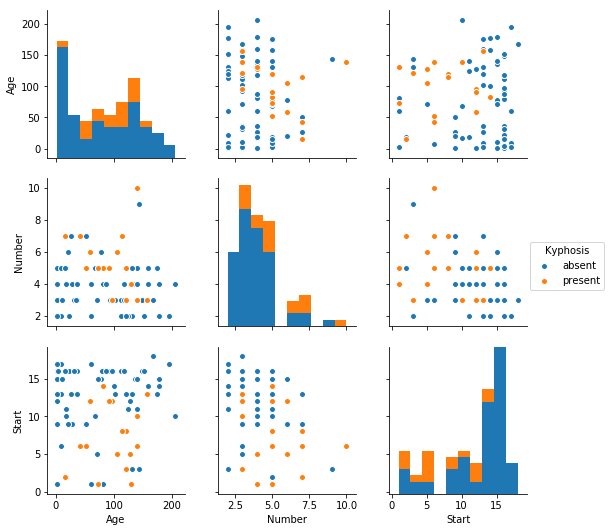

In [10]:
sns.pairplot(df,hue='Kyphosis');

In [11]:
df.iplot(kind ='box') 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#We are going to set our X and y
X=df.drop('Kyphosis',axis=1)

In [15]:
y=df['Kyphosis']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100) #split X and y into training sets

In [17]:
from sklearn.tree import DecisionTreeClassifier #our classifier

In [21]:
#our model for classification, to be fitted to the training data
dtree= DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
#We want to make a prediction as to whether a child has Kyphosis or not
predictions = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix


In [32]:
#The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class
#The classification_report function builds a text report showing the main classification metrics
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[17  6]
 [ 2  2]]


             precision    recall  f1-score   support

     absent       0.89      0.74      0.81        23
    present       0.25      0.50      0.33         4

avg / total       0.80      0.70      0.74        27



# What is the confusion matrix telling us?

Of the 8 positive cases (the upperright + lowerleft diagnol values) 

we identified 2 correctly (lower right value)

recall is how many observed cases were correctly identified. 
F measure is the aggregation of the precision and recall. It is the harmonic mean.

# what are we getting? 80% precision. Can we do better? Let's use a random forest 

In [27]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc=RandomForestClassifier(n_estimators=200)

In [29]:
rfc.fit(X_train,y_train) # Fitting our training data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
# Let's make a prediction
rfc_pred = rfc.predict(X_test)

In [31]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[20  3]
 [ 3  1]]


             precision    recall  f1-score   support

     absent       0.87      0.87      0.87        23
    present       0.25      0.25      0.25         4

avg / total       0.78      0.78      0.78        27



In [37]:
#Hard to tell what performed better?
#The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class
#If you compare the confusion matrices to each other, in the first model you have 2 and 6 being mislabeled
#in the second model you have 3 and 3 being mislabelled (these are the false positives (upper right) and false negatives (lower left))

In [33]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ', accuracy_score(y_test,rfc_pred))

Accuracy score:  0.7777777777777778


In [36]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ', accuracy_score(y_test,predictions))

Accuracy score:  0.7037037037037037


# In terms of accuracy, the random forest model is 10% better

In [42]:
df['Kyphosis'].value_counts() #we have more cases of Kyphosis being absent than present. This imbalance affects our model.


absent     64
present    17
Name: Kyphosis, dtype: int64

# PT 2: Creating a model to predict whether or not a borrower paid back their loan in full from Lending club data set (2007-2010)

In [69]:
#open up the lending tree data
loans=pd.read_csv('loan_data.csv')

In [70]:
#time for exploratory data analysis
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [47]:
loans.columns # We are interested in predicting the column 'not.fully.paid'

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [48]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [49]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Text(0.5,0,'FICO')

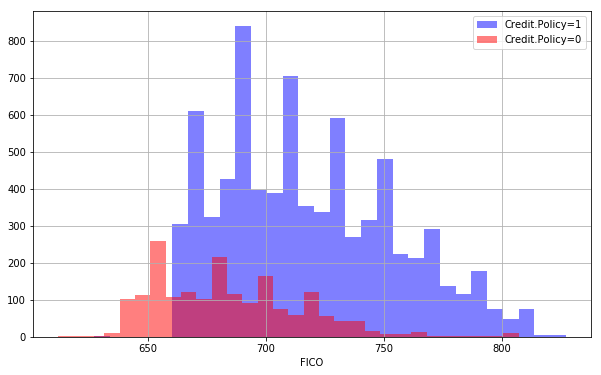

In [59]:
#Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5,0,'FICO')

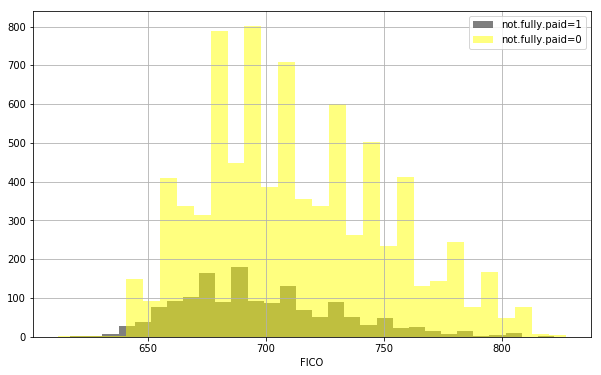

In [72]:
# Lets examine a histogram of two FICO distributions but this time one for each not.fully.paid outcome
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='black',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='yellow',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

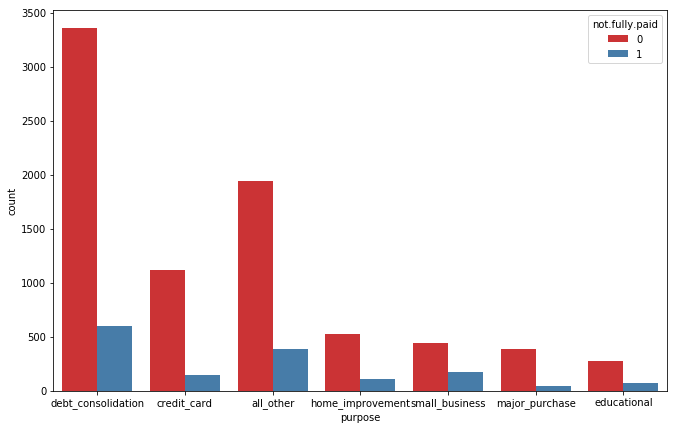

In [73]:
#Creating a countplot to show the counts of loans by purpose
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



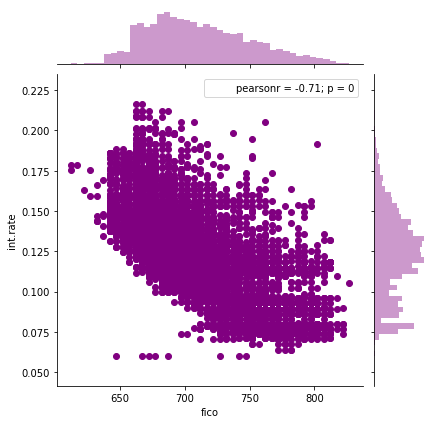

In [75]:
#I want to examine the trend between FICO score and interest rate. Making a joint plot
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple');

<Figure size 792x504 with 0 Axes>

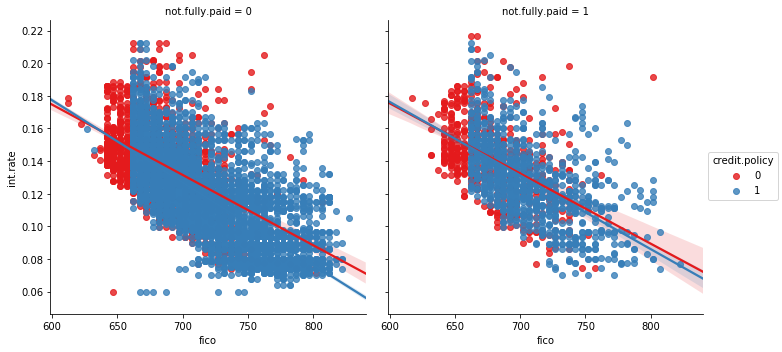

In [80]:
#What does the trend between not.fully.paid and credit.policy look like? Does it differ from above?
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy', col='not.fully.paid', palette='Set1');

# Random Forest Classification Model-Start by setting up data

In [82]:
loans.info() #We need to find any variable that is not a number (i.e. categorical or nominal) and transform them via dummy variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [86]:
#purpose is one such column we need to transform otherwise scikit learn won't understand them
#create a list of 1 element containing the string 'purpose'. Call this list cat_feats
cat_feats = ['purpose']


In [87]:
#use pd.get_dummies to create a fixed larger dataframe that has new feature columns with dummy variables
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [88]:
final_data.info() #We successfully converted all the objects to 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

# Train Test Split

In [89]:
#use sklearn to split data into training set and a testing set
from sklearn.model_selection import train_test_split
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Training a Decision Tree Model

In [91]:
#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [92]:
#create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.
dtree= DecisionTreeClassifier()

In [94]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Predictions and Evaluation of Decision Tree
    #create predictions from the test set and create a classification report and a confusion matrix

In [95]:
predictions =dtree.predict(X_test)

In [96]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [97]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print('Accuracy score: ', accuracy_score(y_test,predictions))

[[1990  441]
 [ 339  104]]


             precision    recall  f1-score   support

          0       0.85      0.82      0.84      2431
          1       0.19      0.23      0.21       443

avg / total       0.75      0.73      0.74      2874



Accuracy score:  0.7286012526096033


# Random Forest Model

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rfc = RandomForestClassifier(n_estimators=600)

In [100]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Random Forest Model Predictions and Evaluations

In [101]:
#predict the class of not.fully.paid for the X_test data
predictions = rfc.predict(X_test)

In [102]:
#Create a classification report from the results
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print('Accuracy score: ', accuracy_score(y_test,predictions))

[[2422    9]
 [ 432   11]]


             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.55      0.02      0.05       443

avg / total       0.80      0.85      0.78      2874



Accuracy score:  0.8465553235908142


# Conclusion: The random forest model performed better than the decision tree model but both can be improved with more feature engineering